# Clustering
## k-means

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

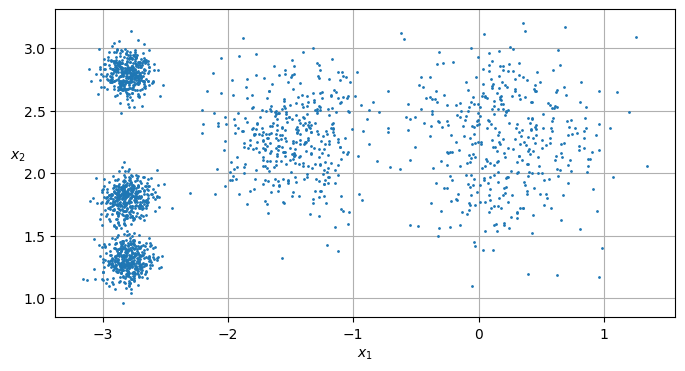

In [2]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

In [3]:
# centroids algo found
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [4]:
# assign new instance to the cluster
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

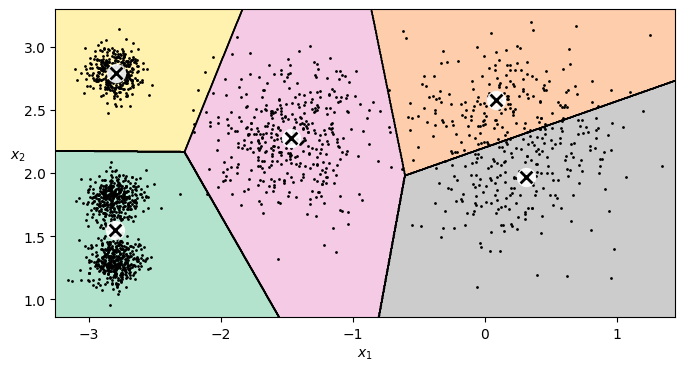

In [5]:
# Voronoi dgm

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

In [6]:
# transform() measure distance from each instance to every centroid
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

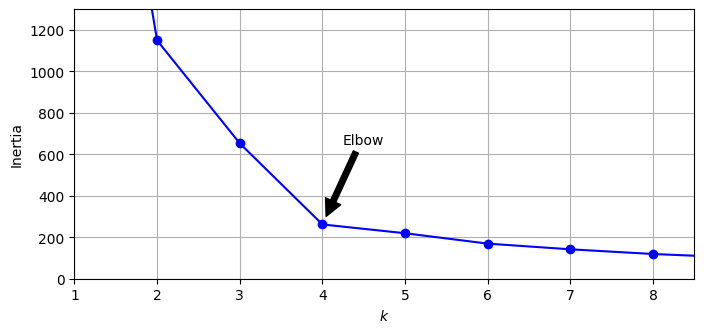

In [7]:
# elbow method

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()

plt.show()

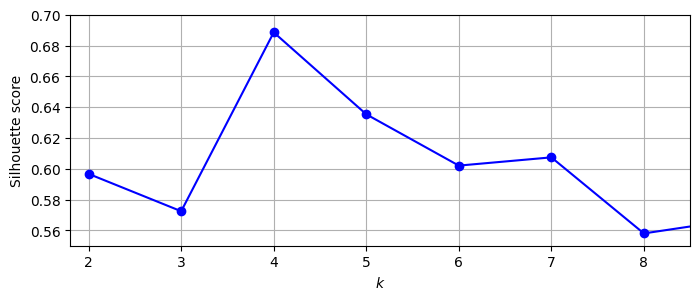

In [8]:
# silhouette score

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

## DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

,eps,0.05
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [10]:
# labels of all instances
print(dbscan.labels_)       # -1 index means anomaly

# indeces of core samples
print(dbscan.core_sample_indices_)

# core instances
print(dbscan.components_)

[ 0  1  2  1  2  1  2  1  1  1  1  1  2  1  1  2  2  1  0  1  2 -1  2  0
  1  0  0  1  1  1  0  2  1  2  2  1  2  1  1 -1  2 -1  3  2  4  2  1  2
  2 -1  2  1  1  1  2  2  2  1  2  1  1  2  2  1  2  2  1  0  1  2  4  0
  1 -1  2  1  2  1  1  1  1  2  2  1  2  1 -1  1  0  2  1  2  1  1  2 -1
  0 -1 -1  2  1  2  2  1  3 -1  1  2 -1  2  2  1  1  1  2  2  1  2  3  2
  1  2  2  2  1 -1  1  1  0  2  1  0  1  2  1  0 -1  3  2  0  0  2  1  1
  2  1  1  1  1 -1  2  1  1  1  0  2 -1  1  1  2  0  2  2  1  1  2 -1  3
  1  2  1  2  0  1  2  2  0  1  1  2  1 -1  2 -1  2  2  2  1  0  2  1 -1
  4  2  3  1  1  1  2  1  1  1 -1  2  3  1  1  1  1  0  2  1  1  2  2  1
  2  1  1  1  2  2  2 -1  0  1  1  0 -1  1  1  1  1  2  2  1  2  1  2  2
  2  2  1 -1  2  1  1  1  2  1  2  2  0  2  1  1  0  1  2  0  1  1  2  1
  1  1  2  2  2  2  2  2  1  2  0  2  2  1  2  2  1  1  2  1  1  2  2  2
  1  2  2  0  1  1  0  1  1  2  1  1  2  2  2  1  1  0  0  2 -1  2  3  1
  1  0  1  1  2  2  2  0  0  2  1  3  2  2  2  2  2

In [12]:
# DBSCAN doesn't have a predict() method, so we need to use other techniques to decide which cluster a new instance belongs to.
# using KneighborsClassifier for prediction
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
# now predict which cluster and estimate probability
X_new = np.array([[-0.5, 0], [0,0.5], [1,-0.1], [2,1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[1 2 3 0]
[[0.   0.9  0.1  0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.2  0.36 0.44 0.  ]
 [1.   0.   0.   0.   0.  ]]


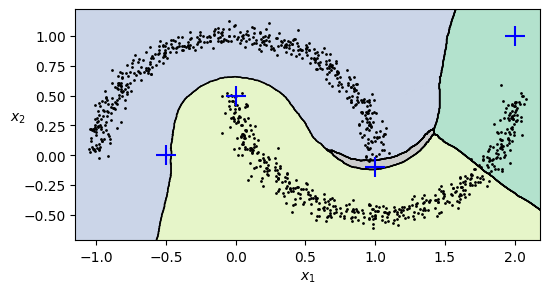

In [14]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()